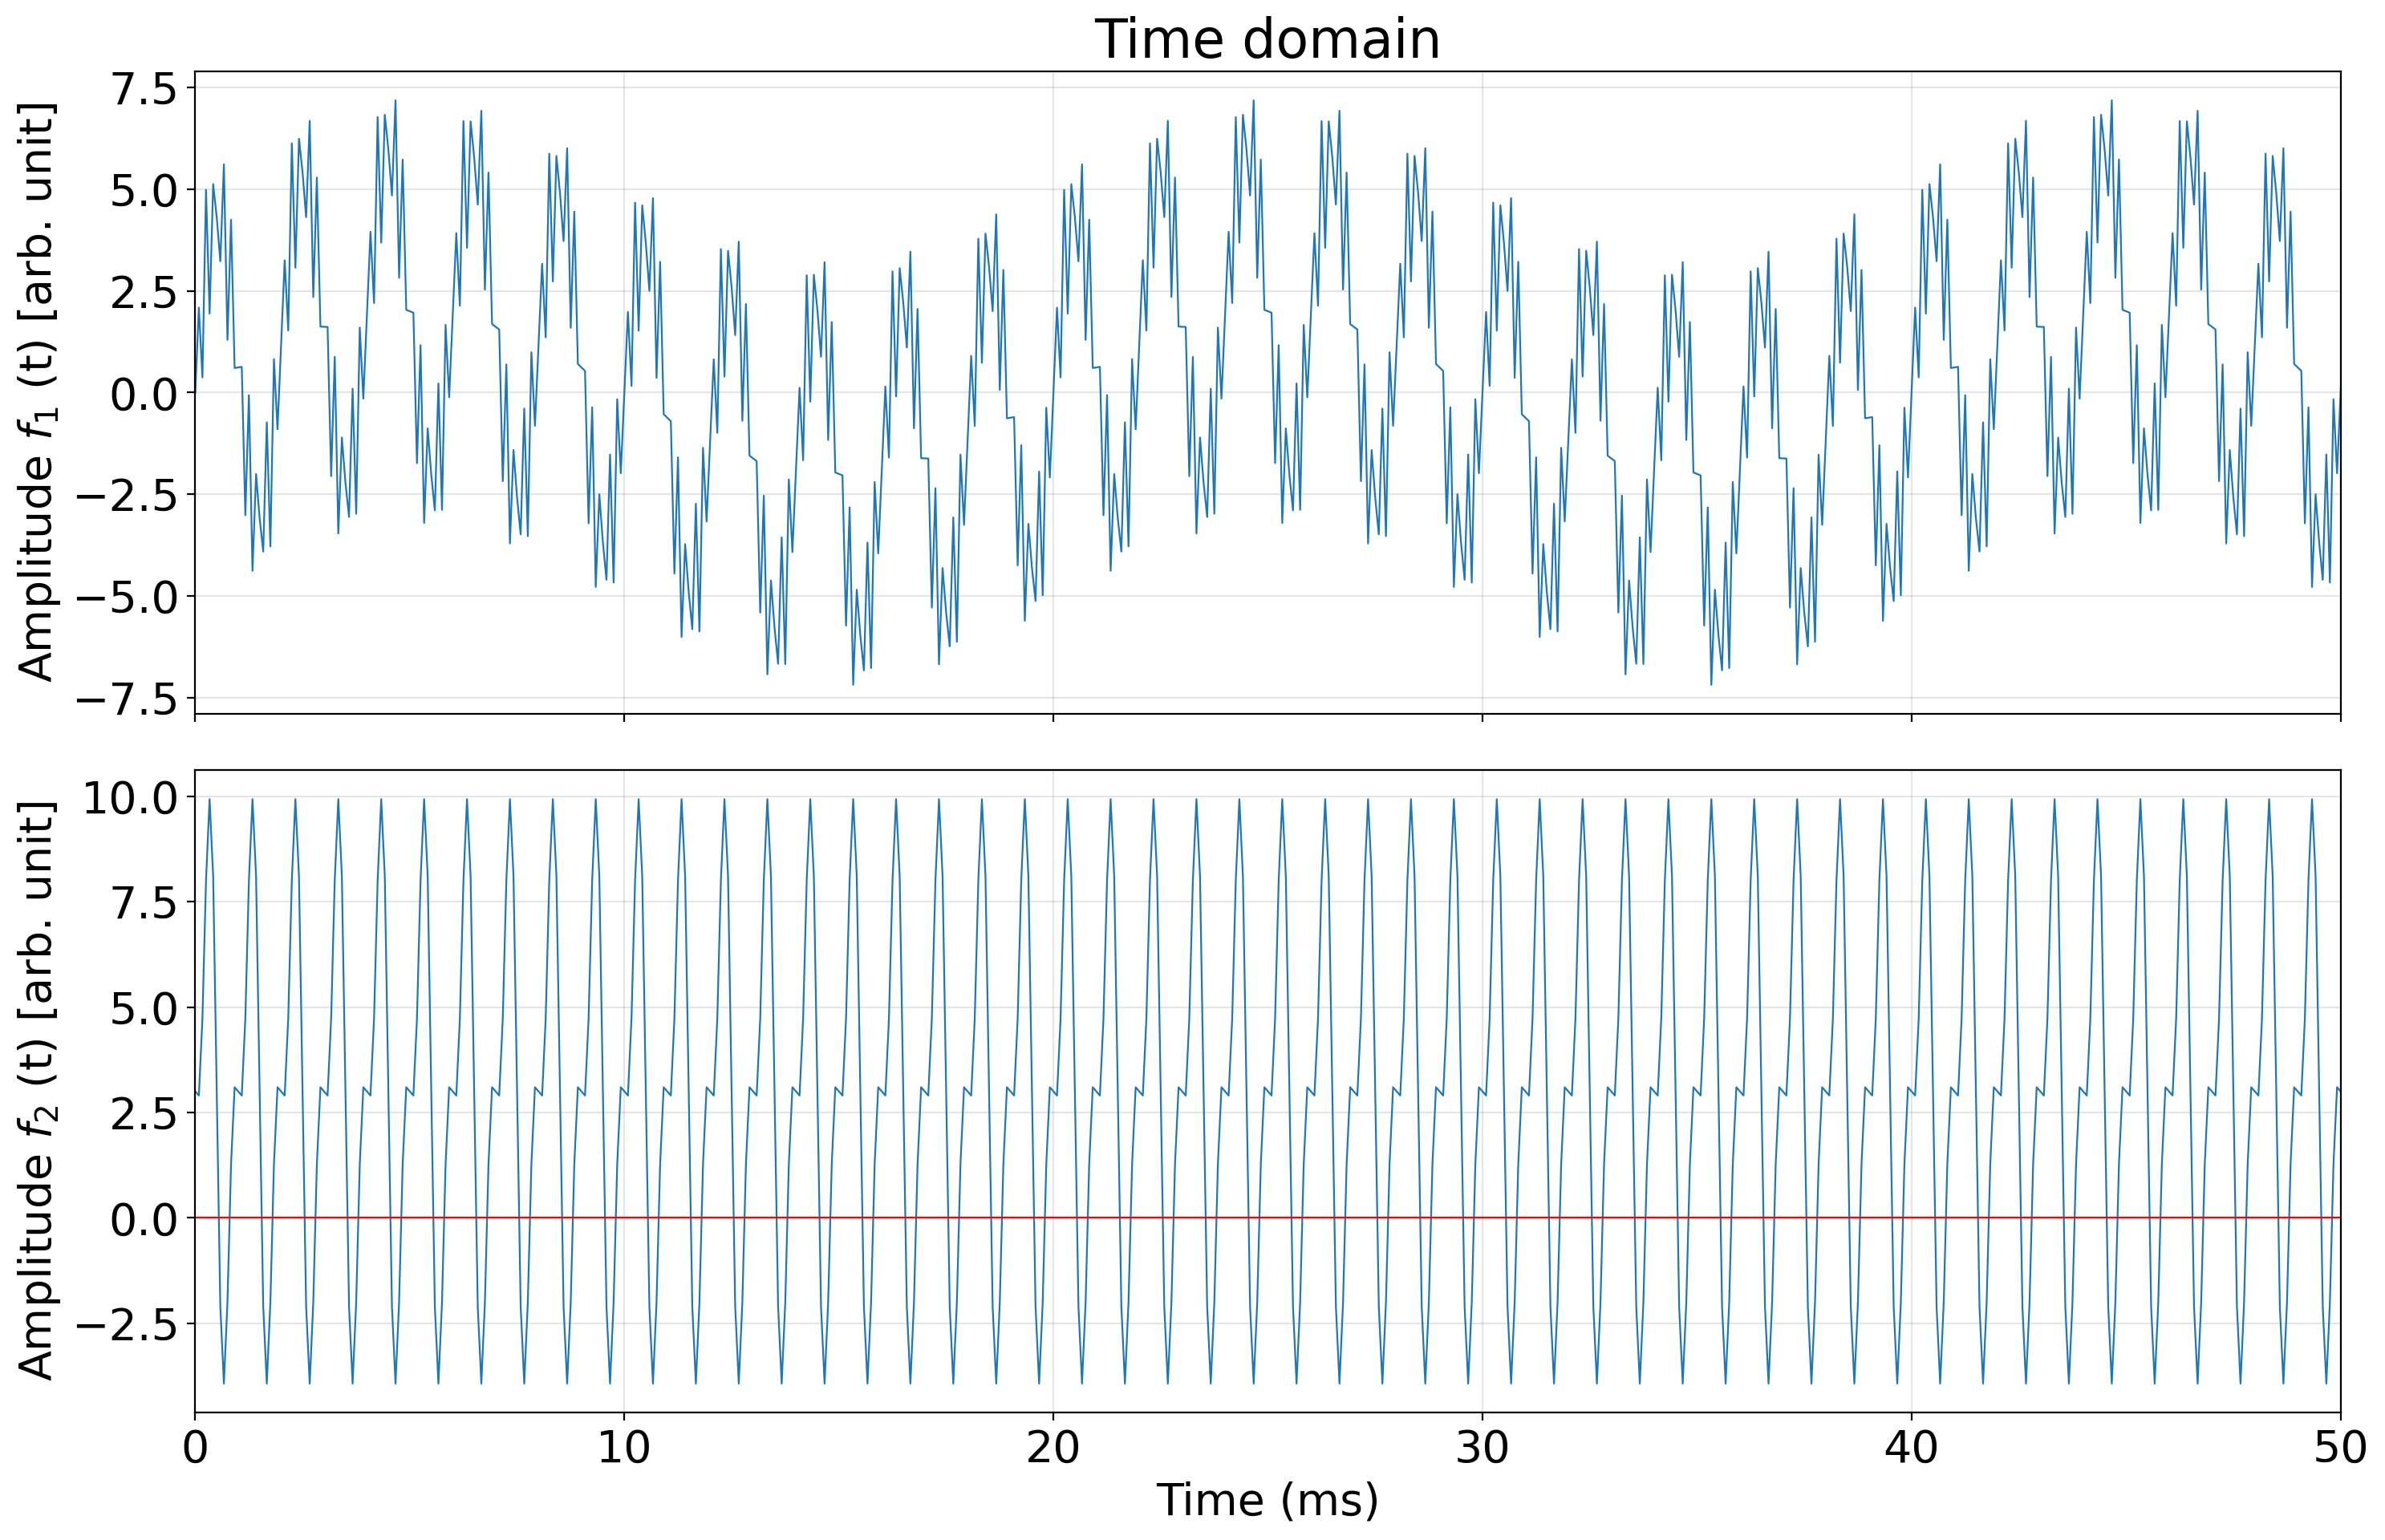

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Freq1 = [50, 500, 5000]
A1 =  [2, 4, 2]
A_01 = 0
d1 = 1
sr1 = 12e3
Freq2 = [0, 1e3, 10e3]
A2 =  [0, 5, 3]
A_02 = 3
d2 = 1
sr2 = 12e3

def function_generator(F_i,A_i,A_0,d,sr):
    xvals = np.arange(0, d, (1/sr))
    function = A_0
    for i in range(len(F_i)):
        function = function + A_i[i]*np.sin(2*np.pi*F_i[i]*xvals)
    return [xvals, function]
    
result1 = function_generator(Freq1,A1,A_01,d1,sr1)
f1 = result1[1]
xvals1 = result1[0]

result2 = function_generator(Freq2,A2,A_02,d2,sr2)
f2 = result2[1]
xvals2 = result2[0]

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.dpi"] = 200
plt.rcParams['figure.figsize'] = [7.5*2,10]
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.2)

fig1, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(xvals1,f1)
axs[0].set_ylabel("Amplitude $f_1$ (t) [arb. unit]")
axs[0].set_title("Time domain")
axs[0].set_xlim([0,5e-3])
axs[0].set_xticks([0,1e-2,2e-2,3e-2,4e-2,5e-2])
axs[0].set_xticklabels([0,10,20,30,40,50])
#axs[0].set_xlabel("time (t)")
axs[0].grid()


axs[1].plot(xvals2,f2)
axs[1].plot([0,50e-3],[0,0],color="red")
axs[1].set_ylabel("Amplitude $f_2$ (t) [arb. unit]")
axs[1].set_xlabel("Time (ms)")
axs[1].set_xlim([0,5e-3])
axs[1].set_xticks([0,1e-2,2e-2,3e-2,4e-2,5e-2])
axs[1].set_xticklabels([0,10,20,30,40,50])
axs[1].grid()


plt.savefig("generated_functions.jpg")
plt.tight_layout()
plt.show()

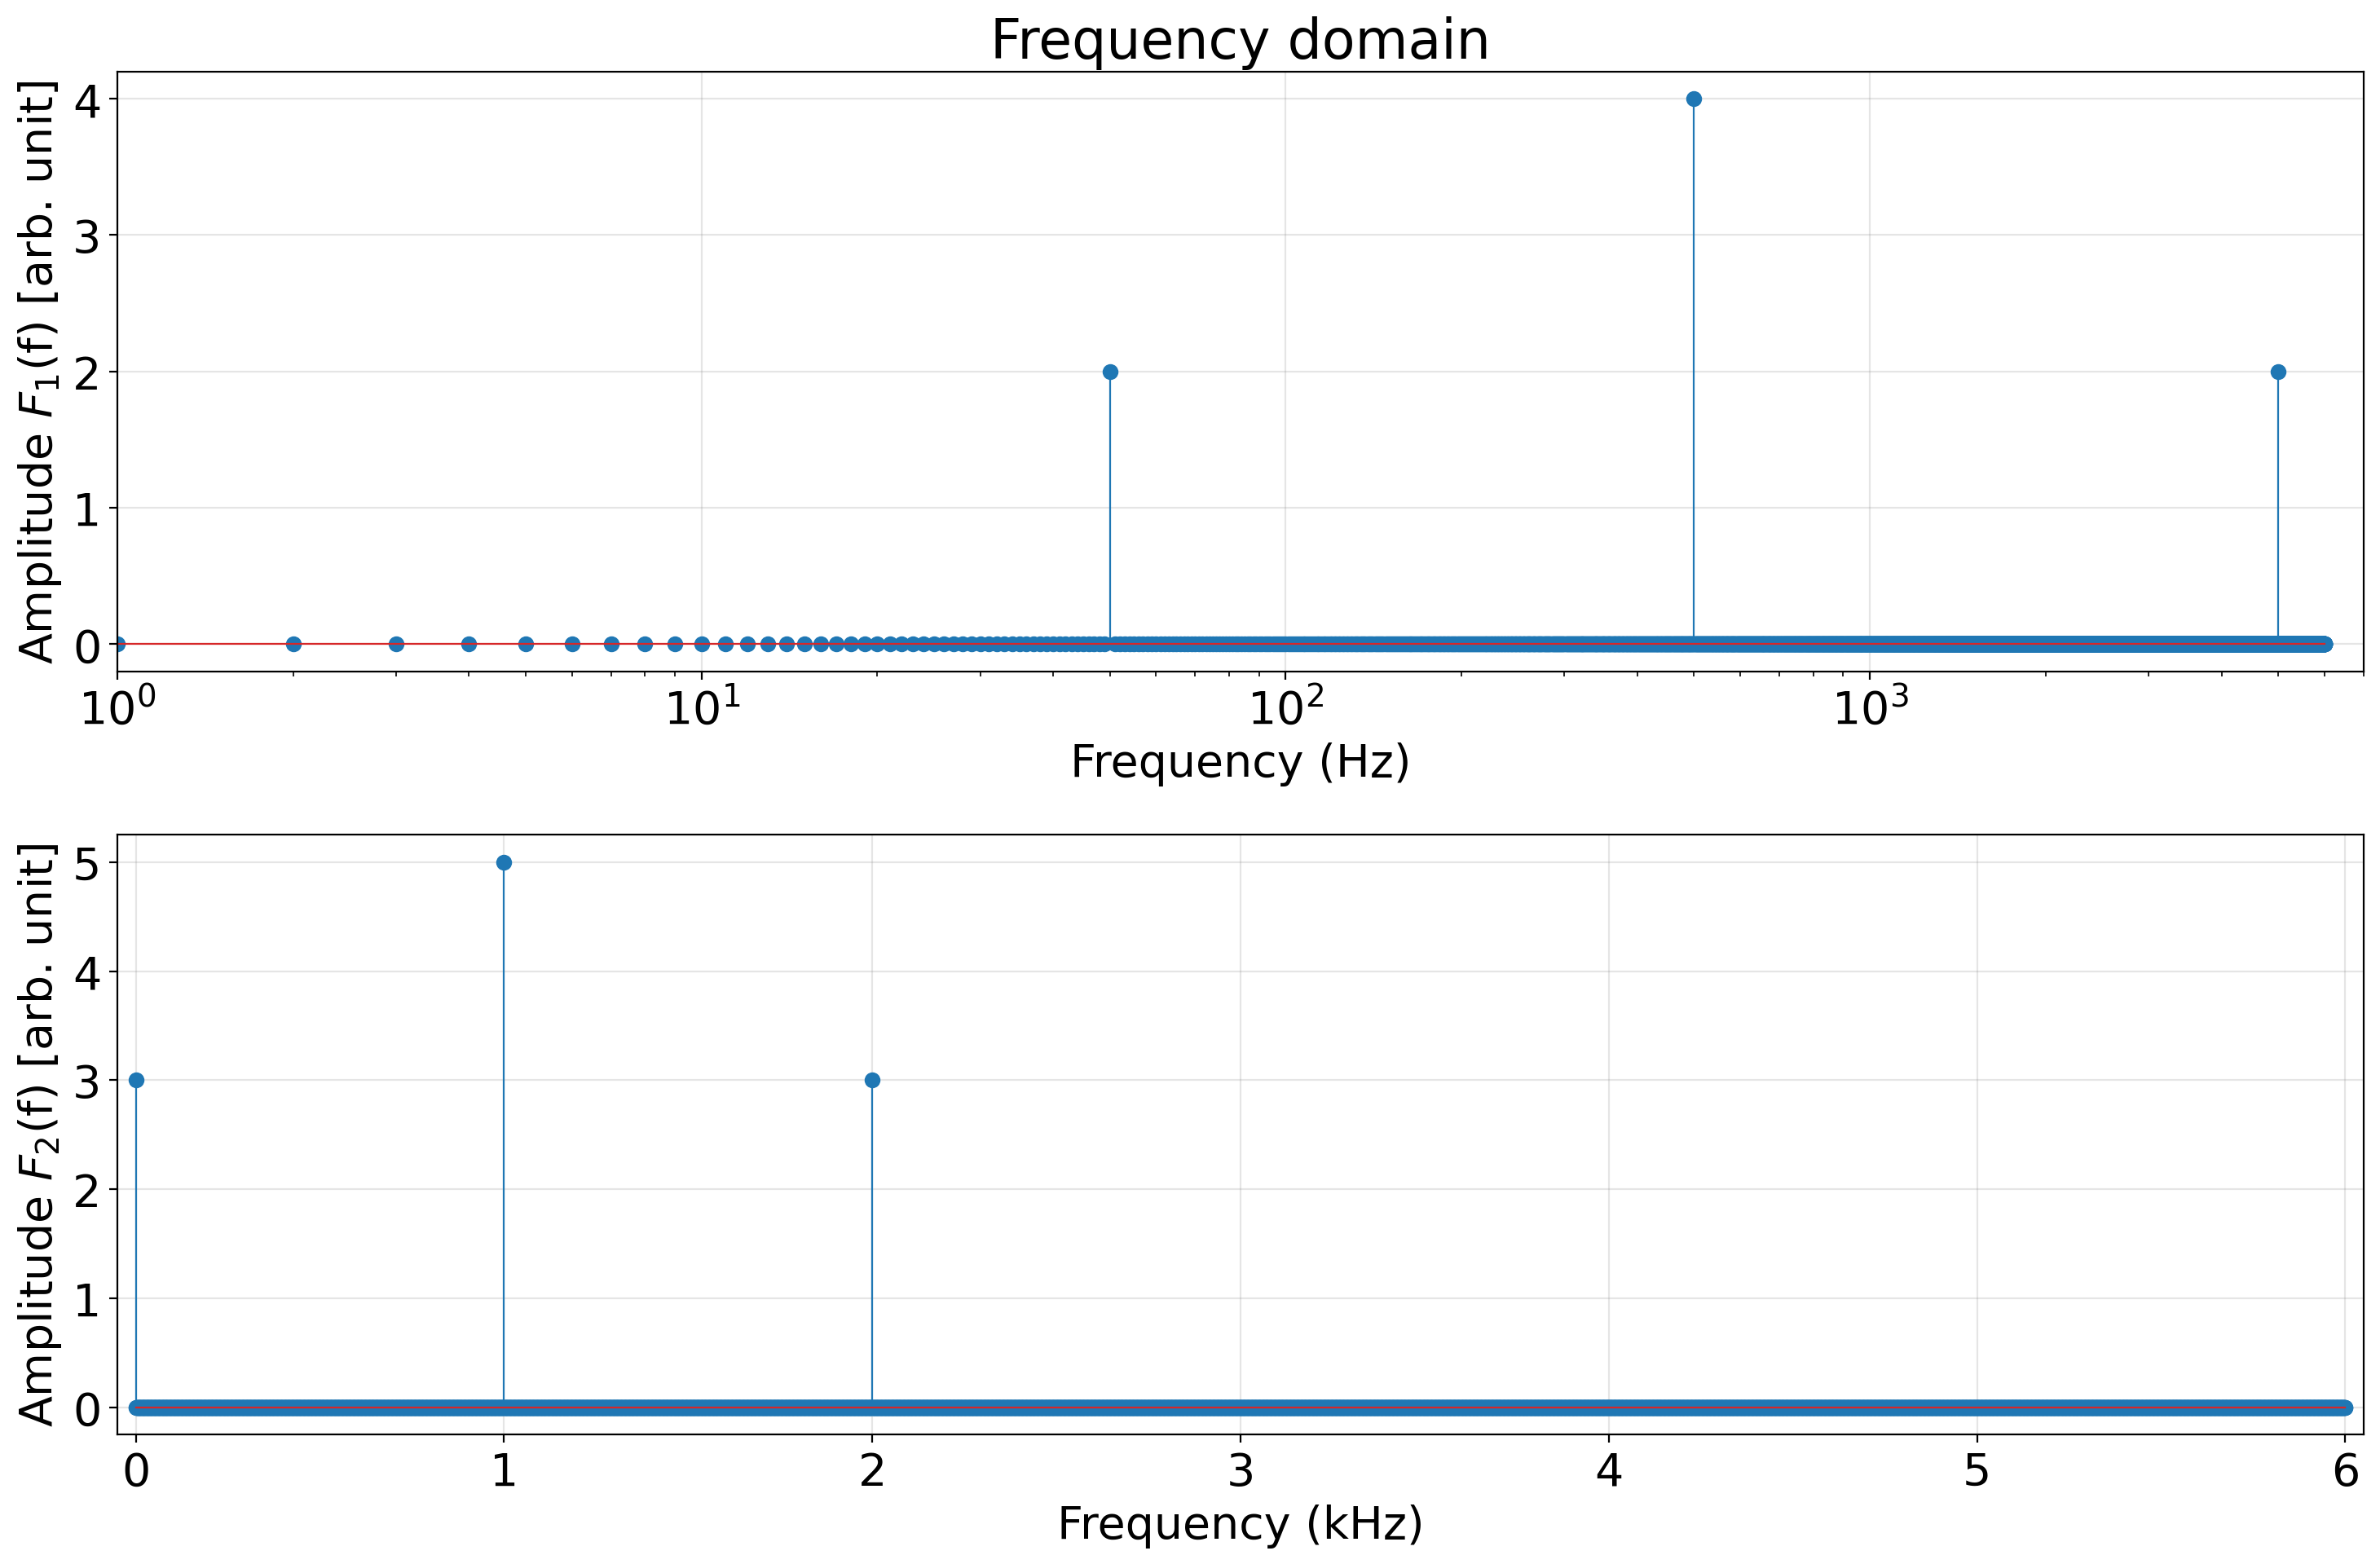

In [2]:


from numpy.fft import fft, ifft

def FFT(f_time, sr):

    F_fft = np.fft.rfft(f_time, norm="forward")
    F_amp = np.abs(F_fft)*2
    F_amp[0] = F_amp[0]/2
    freqs = np.fft.rfftfreq(len(f_time), 1/sr)
    t1 = np.arange(0, 1, 1/sr)

    return [F_amp, freqs]

F1, freqs1 = FFT(f1,sr1)

F2 = FFT(f2,sr2)[0]
freqs2 = FFT(f2,sr2)[1]

fig, axs = plt.subplots(2, 1)
axs[0].set_title("Frequency domain")
axs[0].stem(freqs1, F1, basefmt="C3")
axs[0].set_title("Frequency domain")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Amplitude $F_1$(f) [arb. unit]")
axs[0].set_xlim([1,7000])
axs[0].set_xscale('log')
axs[0].grid()

axs[1].stem(freqs2, F2, basefmt="C3")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Amplitude $F_2$(f) [arb. unit]")
# # axs[1].set_xlim([-2,3000])
axs[1].set_xscale('linear')
axs[1].set_xlim([-50,6.05e3])
axs[1].set_xticks([0,1e3,2e3,3e3,4e3,5e3,6e3])
axs[1].set_xticklabels([0,1,2,3,4,5,6])
axs[1].grid()

plt.savefig("fft_functions.jpg")
plt.tight_layout()


# xvals1_fft = np.logspace(1e-3, 1e6, num=20)

# fig2, axs = plt.subplots(2, 1, sharex=True)

# axs[0].semilogx(xvals1_fft,f1_fft)
# axs[0].set_ylabel("$f_1$ (t)")
# #axs[0].set_xlabel("time (t)")
# #axs[0].set_xlim([0,5e-2])

# # axs[1].plot(xvals2,f2)
# # axs[1].set_ylabel("$f_2$ (t)")
# # axs[1].set_xlabel("time (ms)")
# # axs[1].set_xlim([0,5e-2])
# # axs[1].set_xticks([0,1e-2,2e-2,3e-2,4e-2,5e-2])
# # axs[1].set_xticklabels([0,10,20,30,40,50])
